## **<center>D208 NBM2 Task 2: LOGISTIC REGRESSION FOR PREDICTIVE MODELING<center>** 

Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
April 01, 2022

### Part I: Research Question

#### A.  Describe the purpose of this data analysis by doing the following:

#### A.1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using logistic regression.

Is it possible to predict which patients are at a higher risk of being readmitted after initial discharge based on medical history and data from their current admission? 

#### A.2. Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The medical data set contains data on 10,000 patients with demographic information,  past medical history, medical data for hospital admission, hospital charges, and survey results. The objective of the analysis is to identify which of the medically-related data, if any,  can be used to predict total daily charges for hospitalized patients.

### Part II: Method Justification

#### B.  Describe logistic regression methods by doing the following:

#### B.1. Summarize the assumptions of a logistic regression model.

1) Appropriate outcome type- the dependent variable is binary.
2) Linearity of independent variables- continuous variables must have a linear relationship with the log-odds of the outcome.
3) No strongly influential outliers- values that are outliers can negatively affect the accuracy of a logistic model.
4) Absence of Multicollinearity- highly correlated factors can negatively affect the precision of the logistic model.
5) Independence of observations- data should not be repeated measurements of the same variable or paired data.
6) Sufficiently large sample size- the sample size must be large enough to draw valid conclusions to prevent overfitting. There should be at least 10 examples of the least frequent outcome for each factor.   
Leung (2021)

#### B.2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I chose Python as my programming language. I am new to the field of data analytics and do not have any programming experience, so I chose to focus on learning a single language for this course. The Numpy and Pandas packages have the needed tools to analyze and manipulate large data frames. There are also countless libraries available to simplify complex tasks. I utilized statsmodels and sklearn for modeling functions, feature engine for outlier identification, and matplotlib, seaborn, yellowbrick, and plotnine for visualizations. 

#### B.3. Explain why logistic regression is an appropriate technique to analyze the research question summarized in Part I.

Since the dependent variable is binary and the independent variables are both quantitative and qualitative,  logistic regression is the appropriate method. Bevans (2021)

### Part III: Data Preparation

#### C.1. 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

My plan to clean the data set is to start with importing the csv file and create a backup copy before doing any manipulation. After examining the shape and looking at column names and data types, I will drop the columns that are not needed for the analysis based on their description in the data dictionary accompanying the data set. I will then check for duplicate rows and missing values. The next step will be to examine the values in each column to verify they are consistent with the range and format defined in the data dictionary that accompanied the data set, while simultaneously looking for hidden missing values that have been replaced with placeholders. Re-expression of the categorical variables with dummy variables will be created for modeling, dropping one from each feature. Distribution will be visualized with histograms. Numeric variables will also be visualized with boxplots. Outliers will be evaluated with boxplots and feature engine "Outlier Trimmer", then treated if needed. The independent variables will be evaluated for correlation with the dependent variable 'ReAdmis'.  They will also be checked with a correlation heat map for independence and variance inflation factors for multicollinearity. Troublesome variables will be dropped. Bivariate visualizations will be used to further evaluate relationships between independent variables and the target.(Larose, C. D., & Larose, D. T. (2015))

#### C.2. Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

|  Name |  Data Type |  Variable Type|Description |  #Unique | Example/Range  |
|:---|:---|:---|:---|---:|---:|
|Information on patient on admission|
|Age|float64|Quantitative/Discrete|Age of patent|72|18-89|
|Gender|object | Categorical /Nominal |Reported gender|3|Female, Male, Nonbinary|
|ReAdmis |object| Categorical /Binary|Patient readmitted within 30 days of discharge from initial admission|2|No, Yes|
|VitD_levels|float64| Quantitative/Continuous|Lab value for Vitamin D level|9976|9.806483-26.394449|
|Doc_visits  |int64  |Quantitative/Discrete|Primary care doctor's visits to patient during initial admission|9|1-9|
|Full_meals_eaten|int64|Quantitative/Discrete|Total number of full meals eaten during hospitalization. Initial verses readmission not specified. Partial meals recorded as 0, more than 3 meals were given if requested|8|0-7|
|VitD_supp|int64  |Quantitative/Discrete|Number of vitamin D supplements given. Initial verses readmission not specified|6|0-5|
|Patient history recorded in chart|
|Soft_drink| object| Categorical /Binary |3 or more sodas consumed daily|2|No, Yes|
|Initial_admin|object| Categorical /Nominal |Type of initial admission|3| Emergency Admission, Elective Admission, Observation Admission|
|HighBlood|object| Categorical /Binary |Diagnosed with high blood pressure|2|No, Yes|
|Stroke|object| Categorical /Binary |History of stroke|2|No, Yes|
|Complication_risk|object| Categorical /Nominal |Complication risk level recorded in initial patient assessment|3| Low, Medium, High|
|Overweight|float64| Categorical /Binary |Patient is considered overweight based on age, gender, and height |2|No, Yes|
|Arthritis|object| Categorical /Binary |Diagnosed with arthritis|2|No, Yes|
|Diabetes|object|Categorical /Binary |Diagnosed with diabetes|2|No, Yes|
|Hyperlipidemia|object| Categorical /Binary |Diagnosed with hyperlipidemia|2|No, Yes|
|BackPain|object| Categorical /Binary |Diagnosed with chronic back pain|2|No, Yes|
|Anxiety|float64| Categorical /Binary |Diagnosed with anxiety disorder|2|No, Yes|
|Allergic_rhinitis|object| Categorical /Binary |Diagnosed with allergic rhinitis|2|No, Yes|
|Reflux_esophagitis|object| Categorical /Binary |Diagnosed with reflux esophagitis|2|No, Yes|
|Asthma|object| Categorical /Binary |Diagnosed with asthma|2|No, Yes|
|Billing information from chart|
|Services|object| Catigorical/Nominal |Services received during hospitalization. Initial verses readmission not specified|4|blood work, intravenous, CT scan, MRI|
|Initial_days|float64| Quantitative/Continuous|Length of initial hospital stay|9997| 1.001981- 71.981490|
|TotalCharge|float64| Quantitative/Continuous|Average daily charge. Total Amount/# of days. Does not include specialized treatments. Initial verses readmission not specified|10,000|1938.312067- 9180.728000|
|Additional_charges|float64| Quantitative/Continuous|Average amount charged for "miscellaneous procedures, treatments, medicines, anesthesiology, etc". Initial verses readmission not specified|8,888|3,125.702716- 3,0566.073130|


#### C.3.  Explain the steps used to prepare the data for the analysis, including the annotated code

1.	Import packages
2.	Define functions to be used
3.	Load data
4.	Make a backup copy
5.	Examine the data set for shape, column name/count, and data types 
6.	Drop columns not applicable to the research question using the definitions provided in the data dictionary 
7.	Evaluate the dataset for missing values and duplicate rows
8.	For each variable:  
a.	Evaluate distribution  
b.	Examine categorical unique values for improper entries  
c.	Identify outliers, treat if needed
9.	Re-express categorical variables to numeric, and drop one of each for modeling
10.	Explore prospective independent predictor variables:  
a.	Check for correlation with the target variable  
b.	Check for correlation and multicollinearity with each other  
c.	Check for relationship with target with bivariate visualizations  
11. Scale data


##### Import Packages

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as p9
import warnings
import pylab
from scipy.stats import chi2_contingency
import scipy.stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn import preprocessing

from yellowbrick.classifier import DiscriminationThreshold

from feature_engine.outliers import OutlierTrimmer

In [2]:
#Python version
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [3]:
## Versions
print(pd.__version__)
print(np.__version__)

1.2.5
1.20.1


In [4]:
warnings.filterwarnings('ignore')

##### Functions

In [5]:
#Value Counts for categorical variables
def val_count(df):  
    cat_cols = df.select_dtypes('object').columns
    for col in cat_cols:
        print(df[col].value_counts())
        print()
    return

In [6]:
#function to label encode variables
def label(df):
    cat_cols = df.select_dtypes('object').columns
    labelencoder = LabelEncoder()
    for col in cat_cols:
        df[col] = labelencoder.fit_transform(df[col])
    return

In [7]:
#Function to plot histograms of categorical variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def cat_hist(df): 
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (4, 2))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            sns.displot(df, x=df[col])
    return

In [8]:
#Function to plot histograms and boxplots of integer variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def int_hist(df):  
    # List of integer columns
    int_cols = df.select_dtypes('int64').columns
    
    for col in int_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (8, 6))
            sns.countplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            
        else:
            plt.figure(figsize = (6, 4))
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            sns.displot(df, x=df[col])                       
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        
    return

In [9]:
#Function to plot distribution and boxplots of float variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def float_box(df):
    # List of float columns
    num_cols = df.select_dtypes('float').columns
    
    for col in num_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
              
        plt.figure(figsize = (6, 4))        
        sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
        sns.displot(df, x=df[col])
        plt.title(title, fontsize = 18, pad = 12)
        plt.xlabel(column_name, fontsize = 15)
        plt.xticks(rotation=20)
        plt.ylabel("Frequency",fontsize = 15)
        plt.show();
        
    return

In [10]:
# Funtion for finding upper and lower outliers
#Returns df with outliers dropped
def out(df): 
    outliers = df.copy(deep=True) 
    # List of numbers columns
    num_cols = df.select_dtypes(include='number').columns
    
    #Find upper and lower outliers
    for col in num_cols:
        capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, 
                       variables=[col])
        capper.fit(df)
        upper = capper.right_tail_caps_
        lower = capper.left_tail_caps_       
              
        print(capper.right_tail_caps_)
        print(capper.left_tail_caps_)
        df = capper.transform(df)
    capped = df.copy(deep=True)  
        
    return capped

In [11]:
#Bivariate visualizations for categorical variables
def bi_vis_cat(df):  
    
    x = df.iloc[:,:-1]
    cat_cols = x.select_dtypes('object').columns
     
    for col in cat_cols:
        column_name = col.title().replace('_', ' ')
        title= 'ReAdmis vs  ' + column_name
            
        g = pd.crosstab(df[col], df.iloc[:,-1], normalize = True, margins = True, margins_name = 'Total')
        plt.figure(figsize=(8,6))
        g = sns.heatmap(g, annot=True,cmap="Blues", fmt= '0.2')
        g.set_title(title, fontdict={'fontsize':24}, pad=16)
        g.set_ylabel(col, fontsize = 18)
        g.set_xlabel("ReAdmis", fontsize = 18)
        g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 14)
        g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 16)
        plt.tight_layout()
    return

In [13]:
#Bivariate visualizations for numeric variables
def bi_vis_num(df):  
            
    x = df.iloc[:,:-1]
    # List of numeric columns 
    num_cols = x.select_dtypes(include='number').columns
   
    #iterate over numeric columns
    for col in num_cols:
           
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'ReAdmis vs ' + column_name
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12:
            c = sns.catplot(y=col, hue= 'ReAdmis', kind="count", palette="pastel", data=df)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel('Count', fontsize = 16)
            plt.xticks(rotation=20)
            plt.ylabel(col,fontsize = 20)
            plt.show()
                      
        else:
            # Subplot 1
            ax = sns.catplot(x=col, y= 'ReAdmis', kind="box", data=df)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel('ReAdmis', fontsize = 16)
            plt.xticks(rotation=0)
            plt.ylabel(col,fontsize = 20)
            plt.show()
            # Subplot 2 - Scatter plot xcol vs. ycol
            ax2 = print(p9.ggplot(df)+ p9.aes(x= col, fill= 'ReAdmis') + p9.geom_density(alpha=0.5))
            plt.tight_layout()
            plt.show()
        
    return

In [14]:
# Function to check for collinearity among potential predictors by pairs
#Returns list of factors with abs corr > 0.3
#https://github.com/cutterback/p02-home-sales-predictive-project/blob/master/Home-Sales-Predictive-Model.ipynb
def corr_pair(df): 
    corr = df.iloc[:,:-1].corr()
    d = (
        corr
        .stack()
        .reset_index()
        .sort_values(0, ascending=False)
    )
    # zip the default name columns level_0 and level_1
    d['pairs'] = list(zip(d.level_0, d.level_1))
    # set index to pairs
    d.set_index(['pairs'], inplace=True)
    # now drop level columns
    d.drop(columns=['level_1', 'level_0'], inplace=True)
    # rename correlation column rather than 0
    d.columns = ['correlation']
    # drop duplicates and keep only pair correlations above 0.65
    d.drop_duplicates(inplace=True)
    d=d[abs(d.correlation) > 0.3]
    return d   

In [15]:
#VIF
#Returns df with VIF for factors
def VIF(df):
    X = df.iloc[:,:-1]
    X = sm.add_constant(X) 
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [vif(X.values, i)
    for i in range(len(X.columns))]
  
    print(vif_data)

In [16]:
#Function to evaluate factors for significant relationship to outcome with chi-squared
#Null hypothesis = there is no relationship between these two variables.
def chi_squared(df):
    v = df.iloc[:,:-1]
    cat_cols = v.select_dtypes('object').columns
    failed = []
    passed = []
    for col in cat_cols:
        contingency = pd.crosstab(df.iloc[:,-1], df[col])
        stat, p, dof, expected = chi2_contingency(contingency)
        alpha = 0.05
        print("p value for " + col +" is "+ str(p))
        if p <= alpha:
            passed = passed + [col]
            print('Reject Null Hypothesis for ' + col)
        else:
            failed = failed  + [col]
            print('Do Not Reject Null Hypothesis for ' + col)              
                
        print('________________________________________________')
    print("   ")
    print('Factors to keep ' + str(passed))
    print("   ")
    print('Factors to drop ' + str(failed))
    
    return

In [17]:
# Test for assumption of linearity of log-odds with target
def log_odds(df):
    x = df.iloc[:,:-1]
   
    num_cols = x.select_dtypes('float').columns
    for col in num_cols:
        if len(df[col].value_counts())>10:
            sns.regplot(x= df[col], y= df.iloc[:,-1], data= df, logistic= True).set_title(col + " Log Odds Linear Plot")
            plt.show()
    return

In [18]:
#Function to make confusion matrix
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
def conf_matx(y_test, y_pred):
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8, 6))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    

##### Load data 

In [19]:
# Load data
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean2.csv')

##### Backup

In [20]:
#Back up copy of origional data
df_copy = df.copy(deep=True)

##### Examine 

In [21]:
df.shape

(10000, 50)

In [22]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


##### Drop columns

In [24]:
#Drop unneeded columns. Contain patient identifiers, location/area information, and survey answers not relevant.  
#Job, marital, Income, and children were not specific to patient, listed as patient or primary insurance holder.
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Zip',  'County', 'Lat', 'Lng',
              'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Marital',  'Income', 
               'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   ReAdmis             10000 non-null  object 
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Soft_drink          10000 non-null  object 
 8   Initial_admin       10000 non-null  object 
 9   HighBlood           10000 non-null  object 
 10  Stroke              10000 non-null  object 
 11  Complication_risk   10000 non-null  object 
 12  Overweight          10000 non-null  object 
 13  Arthritis           10000 non-null  object 
 14  Diabetes            10000 non-null  object 
 15  Hyperlipidemia      10000 non-null  object 
 16  BackP

##### Detect duplicate rows and missing values

In [26]:
df.duplicated().sum() #No duplicated rows

0

In [27]:
df.isnull().sum() #No missing values

Age                   0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

##### Examine distribution, identify outliers, look at unique values for improperly formatted input

In [28]:
df.describe(exclude='number') #Non-numeric values- count, unique, most frequent

,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Female,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,5018,6331,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [29]:
#Evaluate value counts and unique values of categorical variables
val_count(df)

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

No     5910
Yes    4090
Name: HighBlood, dtype: int64

No     8007
Yes    1993
Name: Stroke, dtype: int64

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

Yes    7094
No     2906
Name: Overweight, dtype: int64

No     6426
Yes    3574
Name: Arthritis, dtype: int64

No     7262
Yes    2738
Name: Diabetes, dtype: int64

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

No     5886
Yes    4114
Name: BackPain, dtype: int64

No     6785
Yes    3215
Name: Anxiety, dtype: int64

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

No     7107
Yes    2893
Name: Asth

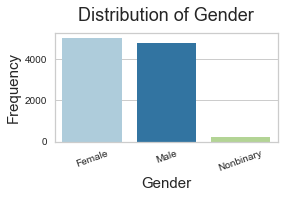

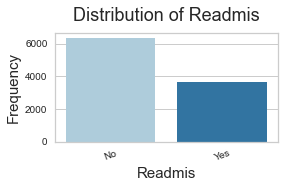

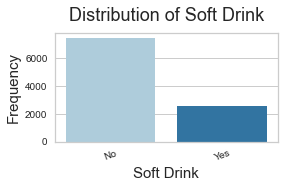

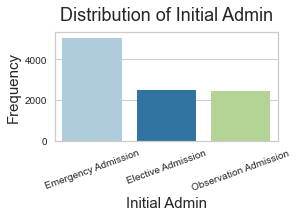

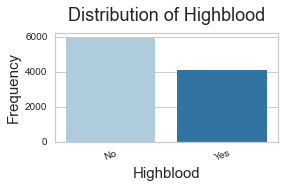

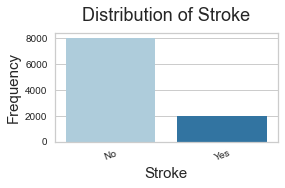

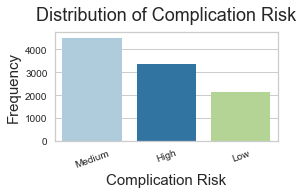

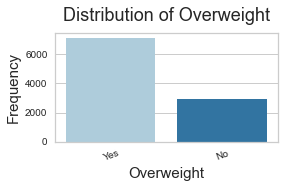

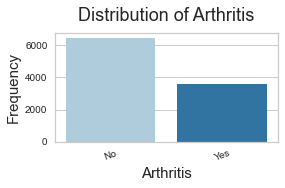

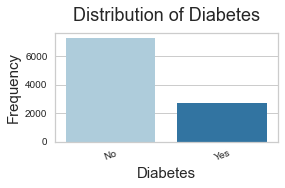

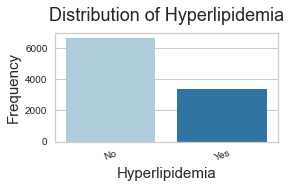

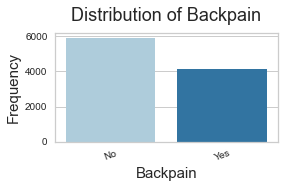

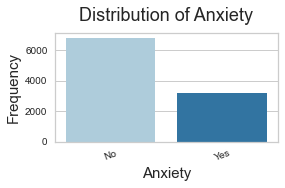

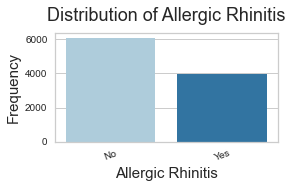

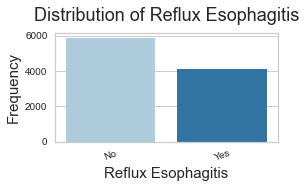

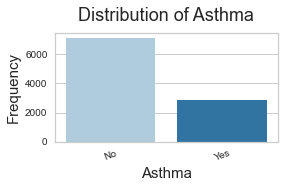

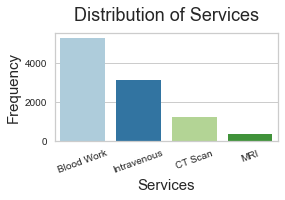

In [30]:
#Univariate visualizations of categorical variables
cat_hist(df)

In [31]:
df.describe() #Numeric values- count, min, max, mean

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587
std,20.638538,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544
min,18.000000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,36.000000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755
50%,53.000000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735
75%,71.000000,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000
max,89.000000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000


In [32]:
#Find upper and lower limits for outliers and return df with outlier rows
#Return df with outliners dropped as capped
capped= out(df)

{'Age': 123.5}
{'Age': -16.5}
{'VitD_levels': 23.430248331250006}
{'VitD_levels': 12.544152781249997}
{'Doc_visits': 9.0}
{'Doc_visits': 1.0}
{'Full_meals_eaten': 5.0}
{'Full_meals_eaten': -3.0}
{'vitD_supp': 2.5}
{'vitD_supp': -1.5}
{'Initial_days': 141.12600662674998}
{'Initial_days': -72.01783771125}
{'TotalCharge': 13896.794511250002}
{'TotalCharge': -3247.5535187500004}
{'Additional_charges': 27075.0026485}
{'Additional_charges': -3481.9119075000017}


In [33]:
# df without outliers
capped.describe()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,9442.000000,9442.000000,9442.000000,9442.000000,9442.000000,9442.000000,9442.000000,9442.000000
mean,52.072972,17.958124,5.010909,0.997035,0.376403,34.504170,5311.040787,12247.043085
std,19.949005,1.963746,1.045611,0.997822,0.584938,26.296670,2177.704395,5808.917175
min,18.000000,12.546070,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,35.000000,16.639447,4.000000,0.000000,0.000000,7.953013,3181.792212,7832.526213
50%,52.000000,17.944696,5.000000,1.000000,0.000000,36.268390,5227.978547,11293.636230
75%,69.000000,19.330237,6.000000,2.000000,1.000000,61.183557,7456.971000,14809.581388
max,89.000000,23.363658,9.000000,5.000000,2.000000,71.981490,9180.728000,27051.462110


In [34]:
#examine rows dropped for outliers
outliers = df[~df.index.isin(capped.index)]
outliers

,Age,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
20,86,Female,No,19.374983,6,2,2,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Blood Work,7.094503,3534.815016,28788.080310
22,31,Female,No,24.565463,5,0,2,No,Emergency Admission,Yes,No,High,No,Yes,No,Yes,No,No,No,Yes,No,Intravenous,3.798955,3430.725944,11112.139460
62,75,Female,No,16.188101,3,2,3,No,Emergency Admission,No,No,Low,No,No,No,Yes,Yes,Yes,Yes,No,No,Intravenous,12.814131,3743.802763,12637.539750
63,63,Female,No,16.756990,5,1,3,Yes,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,Yes,No,Yes,No,Blood Work,23.037219,4486.569552,11058.380500
64,57,Female,No,23.662948,5,0,0,No,Elective Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,CT Scan,1.462114,2328.049638,9578.478337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,73,Female,No,19.297160,5,0,3,No,Elective Admission,No,No,Medium,Yes,No,Yes,No,No,No,Yes,Yes,No,Blood Work,48.006500,5984.700000,12076.370000
9982,47,Female,Yes,16.015330,5,0,3,No,Emergency Admission,Yes,No,High,Yes,No,No,Yes,Yes,No,No,No,No,Intravenous,59.408970,7940.806000,16233.040000
9986,46,Male,No,18.519060,6,6,0,No,Observation Admission,Yes,No,High,No,No,No,Yes,Yes,No,No,No,Yes,Blood Work,50.753960,6719.309000,15591.410000
9993,83,Male,No,18.840740,4,1,1,No,Emergency Admission,Yes,No,High,Yes,No,No,Yes,No,No,No,No,No,Blood Work,40.355300,6294.443000,27882.080000


In [35]:
#558 rows out of 10,000, leaves more than a sufficient number of observations.
df = capped.copy(deep=True)

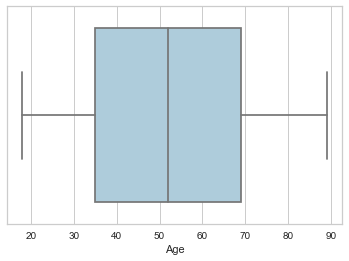

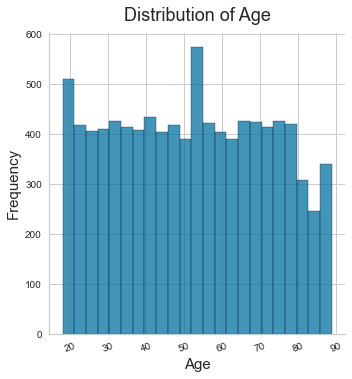

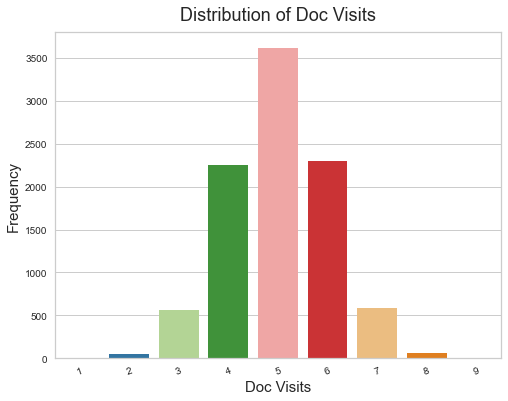

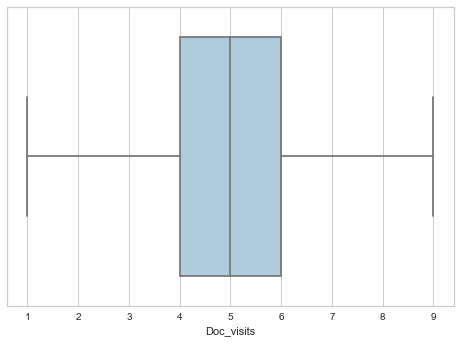

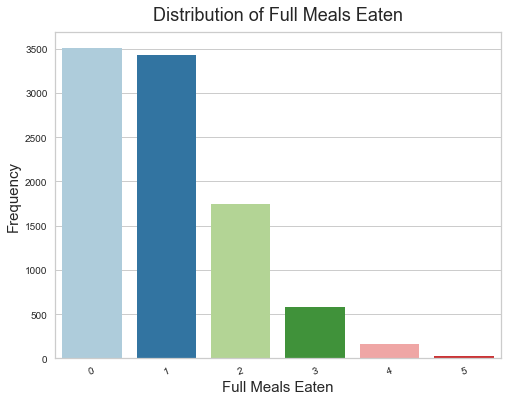

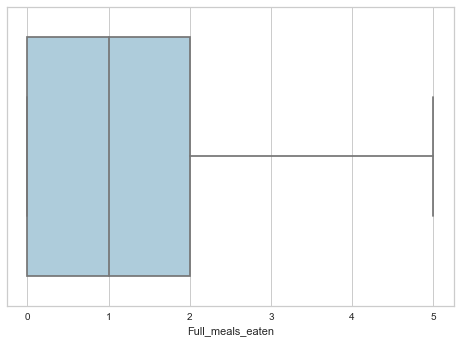

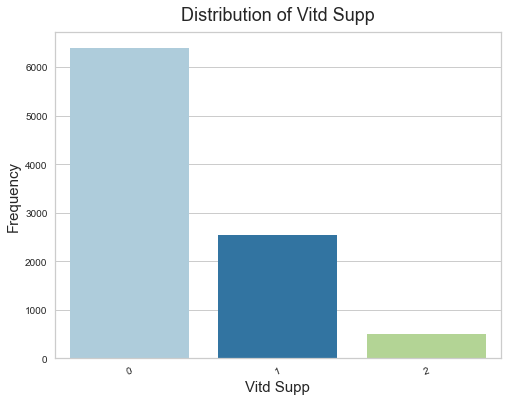

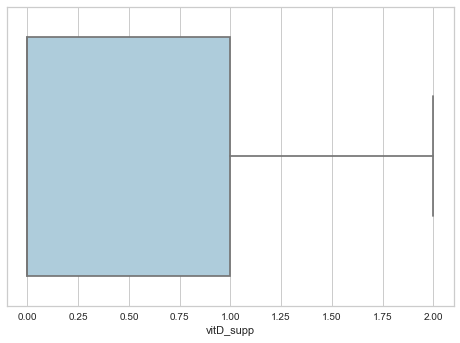

In [36]:
#Univariate visualizations of interger variables
int_hist(df)

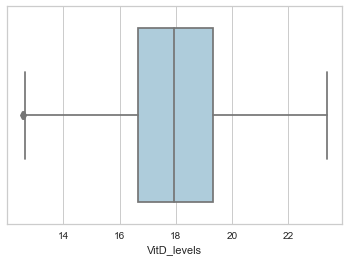

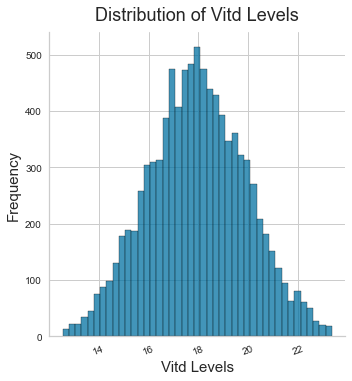

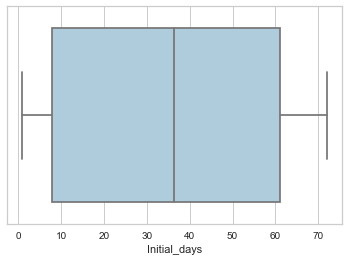

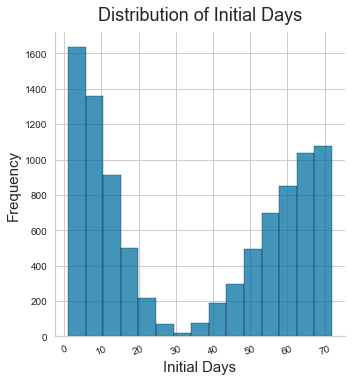

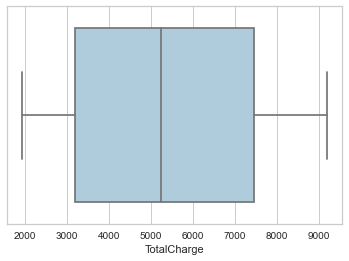

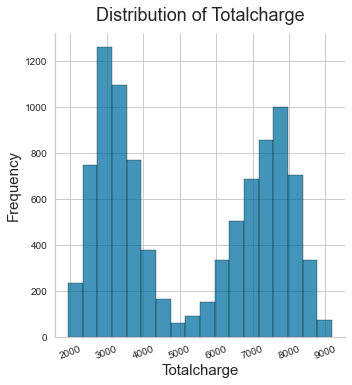

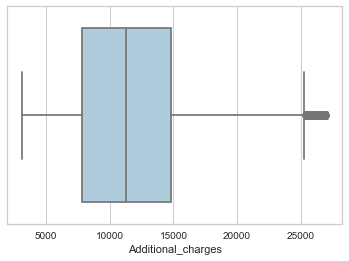

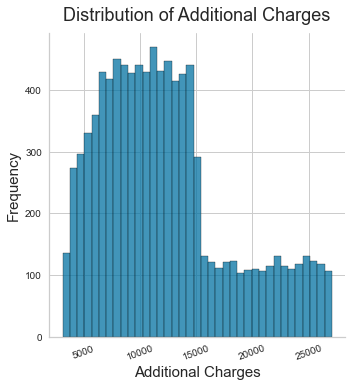

In [37]:
#Univariate visualizations of float variables
float_box(df)

##### Re-express categorical variables to numeric

In [38]:
# Label encoded set needed for some of the plots
data_lab = df.copy(deep=True)
label(data_lab)

In [39]:
#Create set for dummies
data = df.copy(deep=True)

In [40]:
#Re-express categorical variables
#https://datagy.io/pandas-get-dummies/
cat_cols = df.select_dtypes('object').columns

for column in cat_cols:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
        left=data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    data = data.drop(columns=column)

In [41]:
#Copy of data set with all dummies
data_cat = data.copy(deep=True)

#Change categorical back to object type for chi-squared test
data_cat = data_cat[['Gender_Nonbinary',  'Gender_Male',  'Soft_drink_Yes', 'HighBlood_Yes', 'Stroke_Yes','Arthritis_Yes','Diabetes_Yes', 
                     'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Overweight_Yes', 'Reflux_esophagitis_Yes',
                     'Initial_admin_Emergency Admission', 'Services_CT Scan','Services_Intravenous',  'Full_meals_eaten', 'Doc_visits',
                     'vitD_supp', 'ReAdmis_Yes']].astype('object')

In [42]:
#Drop one of each re-expressed variables and put target last.
data = data[['Gender_Nonbinary',  'Gender_Male', 'Soft_drink_Yes', 'HighBlood_Yes', 'Stroke_Yes',
             'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes',
             'Overweight_Yes', 'Reflux_esophagitis_Yes','Asthma_Yes', 'Complication_risk_High', 'Complication_risk_Low', 
             'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission', 'Services_Blood Work', 
             'Services_CT Scan', 'Services_Intravenous', 'Full_meals_eaten', 'Doc_visits',
             'vitD_supp','Age', 'VitD_levels', 'Initial_days', 'Additional_charges', 'TotalCharge', 'ReAdmis_Yes']]

In [43]:
#reorder df to match
df = df[['Gender', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
         'Allergic_rhinitis', 'Overweight', 'Reflux_esophagitis', 'Asthma', 'Complication_risk',
         'Initial_admin', 'Services',  'Full_meals_eaten', 'Doc_visits', 'vitD_supp','Age', 'VitD_levels', 
         'Initial_days', 'Additional_charges', 'TotalCharge', 'ReAdmis']]

In [44]:
#reorder data_lab to match
data_lab = data_lab[['Gender', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
         'Allergic_rhinitis', 'Overweight', 'Reflux_esophagitis', 'Asthma', 'Complication_risk',
         'Initial_admin', 'Services',  'Full_meals_eaten', 'Doc_visits', 'vitD_supp','Age', 'VitD_levels', 
         'Initial_days', 'Additional_charges', 'TotalCharge', 'ReAdmis']]

##### Explore features for inclusion in model

Text(0.5, 1.0, 'Features Correlating with ReAdmis_Yes')

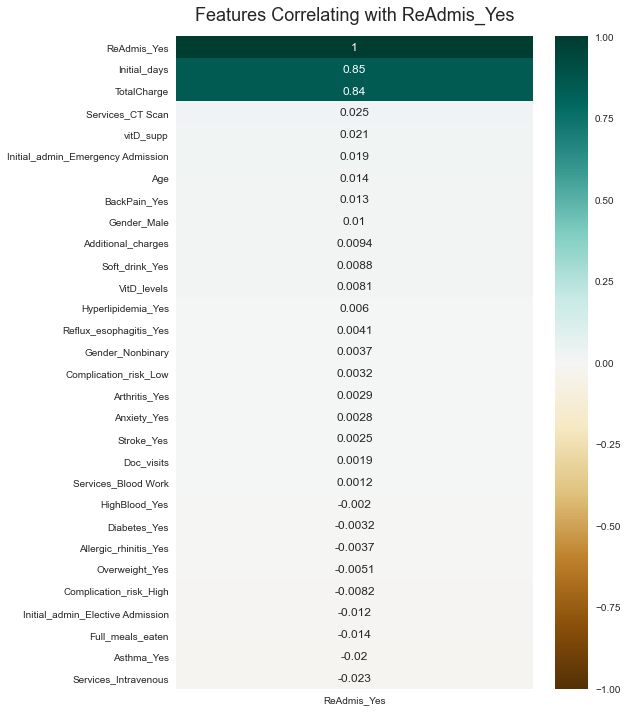

In [45]:
#Heat map list of correlation with target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['ReAdmis_Yes']].sort_values(by='ReAdmis_Yes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with ReAdmis_Yes', fontdict={'fontsize':18}, pad=16)

In [46]:
# Check for correlation between independent variables
data.iloc[:, :-1].corr()

,Gender_Nonbinary,Gender_Male,Soft_drink_Yes,HighBlood_Yes,Stroke_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Overweight_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Complication_risk_High,Complication_risk_Low,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Full_meals_eaten,Doc_visits,vitD_supp,Age,VitD_levels,Initial_days,Additional_charges,TotalCharge
Gender_Nonbinary,1.000000,-0.139898,0.005863,0.012785,0.002605,0.010697,-0.001489,0.008645,0.017694,0.002630,-0.004464,0.007049,-0.019115,0.000522,0.005748,-0.006499,0.005261,-0.002811,0.015366,-0.001233,-0.006922,-0.006197,0.001279,0.008450,-0.000944,0.009110,0.001654,0.006215,0.002534
Gender_Male,-0.139898,1.000000,-0.006283,0.002493,-0.004038,0.007662,-0.002823,0.013871,-0.016439,-0.008295,0.003287,-0.004037,-0.014374,0.006015,-0.003113,-0.003365,0.026533,-0.011632,0.010664,-0.005434,-0.005542,0.011541,-0.004445,0.004426,-0.019746,-0.011952,0.007317,-0.001816,0.005398
Soft_drink_Yes,0.005863,-0.006283,1.000000,-0.008405,0.002794,-0.007440,0.016483,0.018386,0.018153,0.013871,-0.017456,-0.006067,-0.000910,0.012633,-0.003838,-0.004280,0.000089,0.021762,-0.000360,-0.004817,0.000892,0.020198,0.012386,-0.012593,-0.004971,0.003410,0.003514,-0.007620,0.006350
HighBlood_Yes,0.012785,0.002493,-0.008405,1.000000,0.001983,0.010723,-0.003959,-0.011385,0.003225,0.007260,0.012962,0.024684,0.004335,0.002285,-0.000655,-0.028260,-0.005930,-0.005430,0.002328,0.013535,-0.011214,0.013478,0.009498,0.003233,-0.082434,0.005942,-0.008857,0.629024,0.015919
Stroke_Yes,0.002605,-0.004038,0.002794,0.001983,1.000000,-0.014958,0.006507,-0.013077,0.006035,-0.009196,-0.003774,-0.003310,0.004442,0.004104,0.001825,-0.003418,0.004693,-0.010107,0.011416,0.008571,-0.018219,-0.002786,-0.004675,0.004318,0.005178,0.007586,-0.002036,0.027587,-0.003440
Arthritis_Yes,0.010697,0.007662,-0.007440,0.010723,-0.014958,1.000000,0.010698,-0.002117,-0.016055,0.010579,0.006578,0.003425,0.010928,-0.009027,-0.022238,0.000804,0.001846,-0.001537,0.004550,-0.003596,-0.000531,0.013286,-0.002973,-0.004063,0.015240,0.007449,0.014573,0.015388,0.028625
Diabetes_Yes,-0.001489,-0.002823,0.016483,-0.003959,0.006507,0.010698,1.000000,0.011011,-0.010060,0.000147,0.005630,-0.008198,-0.005826,0.018591,-0.003285,0.003286,0.007807,-0.006552,-0.019110,0.013621,0.004006,0.011104,0.012875,-0.013648,0.005411,-0.021353,-0.003438,0.005782,0.011048
Hyperlipidemia_Yes,0.008645,0.013871,0.018386,-0.011385,-0.013077,-0.002117,0.011011,1.000000,0.001792,-0.014449,-0.008774,-0.001463,0.003102,-0.011988,-0.008482,-0.006280,-0.014227,0.020387,0.003281,0.001479,-0.002305,0.000099,-0.025012,0.013226,0.004724,-0.012284,-0.004034,-0.002787,0.017595
BackPain_Yes,0.017694,-0.016439,0.018153,0.003225,0.006035,-0.016055,-0.010060,0.001792,1.000000,0.010290,0.005042,0.008439,0.015773,0.019638,-0.004705,0.017570,-0.009900,0.000790,0.006232,0.014337,-0.018805,-0.018015,0.010847,-0.011435,0.024917,-0.009559,0.016634,0.019442,0.035547
Anxiety_Yes,0.002630,-0.008295,0.013871,0.007260,-0.009196,0.010579,0.000147,-0.014449,0.010290,1.000000,0.003663,-0.011402,-0.007053,0.011588,-0.001483,-0.002301,-0.006184,0.011187,-0.000497,-0.005382,0.008844,0.011136,-0.002197,0.004986,0.003823,0.009032,0.012977,0.009697,0.032705


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

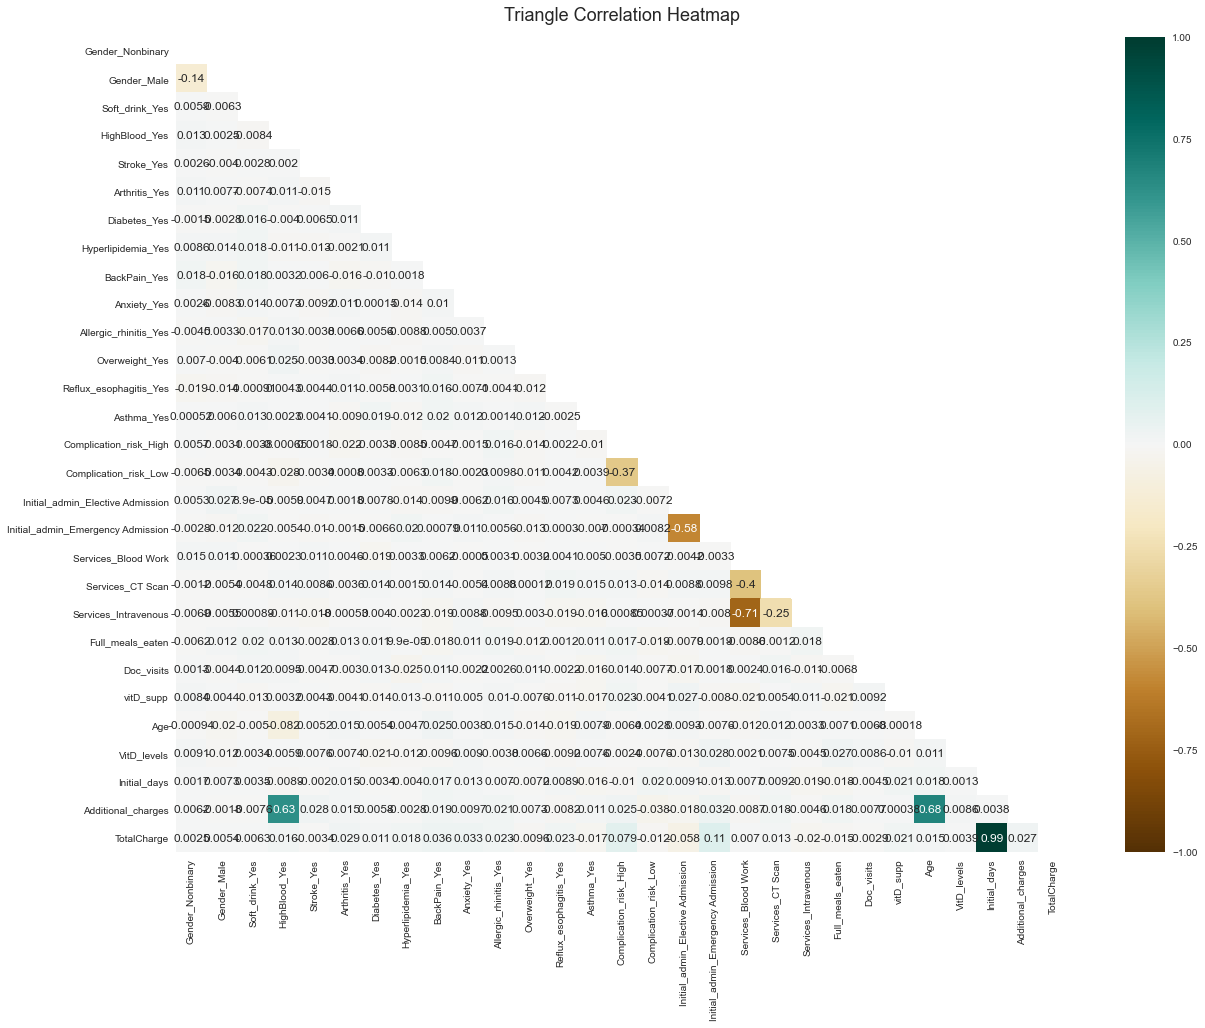

In [47]:
#heat map of independent variables
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(data.iloc[:, :-1].corr(), dtype=np.bool))
heatmap = sns.heatmap(data.iloc[:, :-1].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [48]:
#Heatmap too busy, correlation by pairs > 0.3
corr_pair(data)

,correlation
pairs,
"(Gender_Nonbinary, Gender_Nonbinary)",1.000000
"(TotalCharge, Initial_days)",0.987683
"(Additional_charges, Age)",0.676686
"(HighBlood_Yes, Additional_charges)",0.629024
"(Complication_risk_High, Complication_risk_Low)",-0.366532
"(Services_Blood Work, Services_CT Scan)",-0.395519
"(Initial_admin_Emergency Admission, Initial_admin_Elective Admission)",-0.581893
"(Services_Blood Work, Services_Intravenous)",-0.711702


In [49]:
# Drop factors with high correlation
data = data.drop([ 'Gender_Nonbinary', 'Complication_risk_Low', 'Initial_admin_Elective Admission', 'Services_Blood Work', 'Additional_charges', 'TotalCharge'], axis=1)

In [50]:
# Check variance_inflation_factor for multicollinearity
VIF(data)

                              feature         VIF
0                               const  127.068332
1                         Gender_Male    1.001920
2                      Soft_drink_Yes    1.003082
3                       HighBlood_Yes    1.008767
4                          Stroke_Yes    1.001249
5                       Arthritis_Yes    1.002447
6                        Diabetes_Yes    1.002469
7                  Hyperlipidemia_Yes    1.002933
8                        BackPain_Yes    1.003857
9                         Anxiety_Yes    1.001781
10              Allergic_rhinitis_Yes    1.001950
11                     Overweight_Yes    1.002204
12             Reflux_esophagitis_Yes    1.002173
13                         Asthma_Yes    1.003093
14             Complication_risk_High    1.002523
15  Initial_admin_Emergency Admission    1.002816
16                   Services_CT Scan    1.069529
17               Services_Intravenous    1.069999
18                   Full_meals_eaten    1.004331


In [51]:
#Scale Data
s = data.values
mm_scaler = MinMaxScaler()
scaled = mm_scaler.fit_transform(s)

In [52]:
data_final = pd.DataFrame(scaled, columns = data.columns)

In [53]:
data_final.head()

,Gender_Male,Soft_drink_Yes,HighBlood_Yes,Stroke_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Overweight_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Complication_risk_High,Initial_admin_Emergency Admission,Services_CT Scan,Services_Intravenous,Full_meals_eaten,Doc_visits,vitD_supp,Age,VitD_levels,Initial_days,ReAdmis_Yes
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.625,0.0,0.492958,0.609692,0.135022,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.4,0.375,0.5,0.464789,0.591101,0.199037,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.375,0.0,0.492958,0.509489,0.053117,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.2,0.375,0.0,0.845070,0.372614,0.010044,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500,1.0,0.056338,0.452319,0.003562,0.0


#### C.4. Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

##### Univariate visualizations

See above C.3.

##### Bivariate visualizations

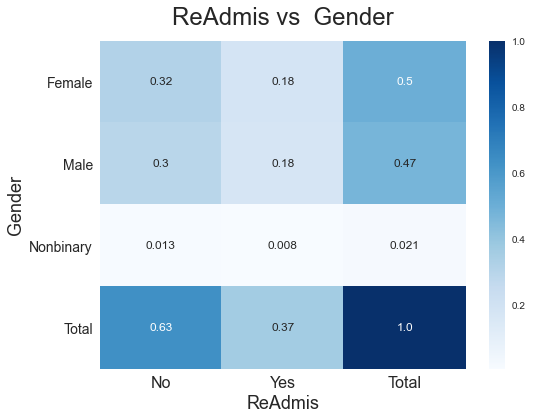

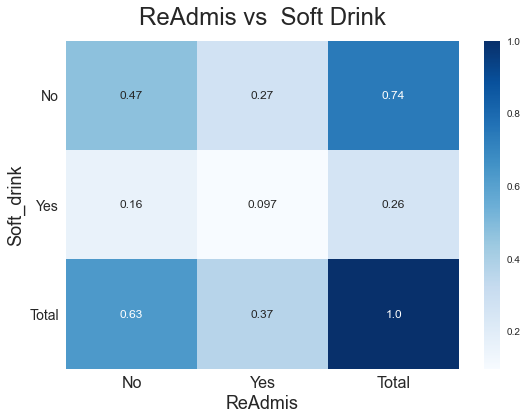

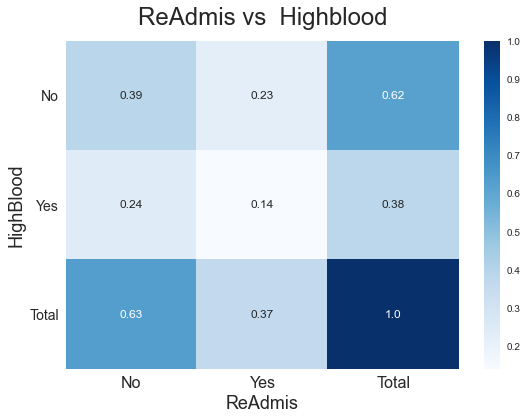

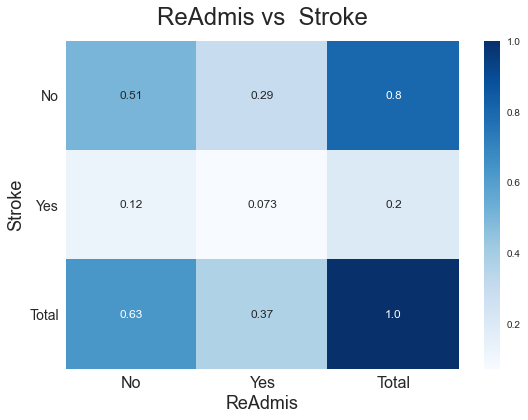

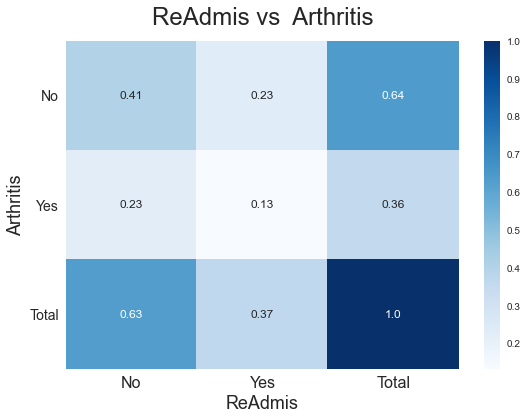

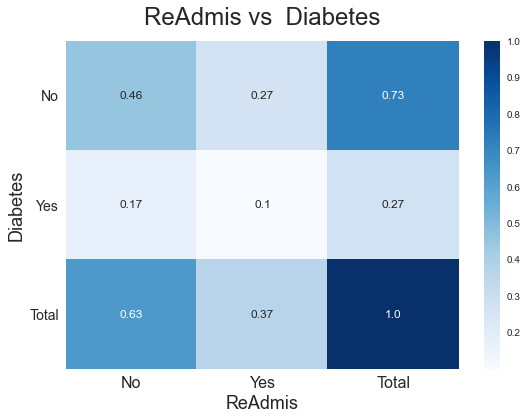

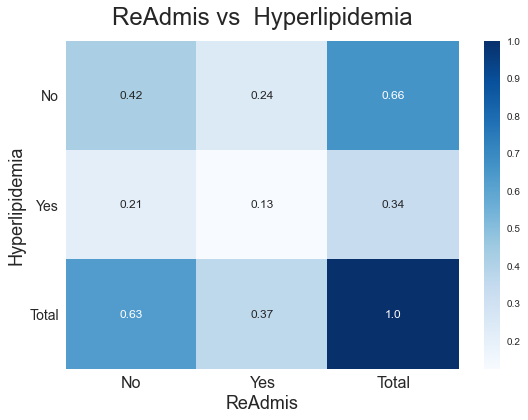

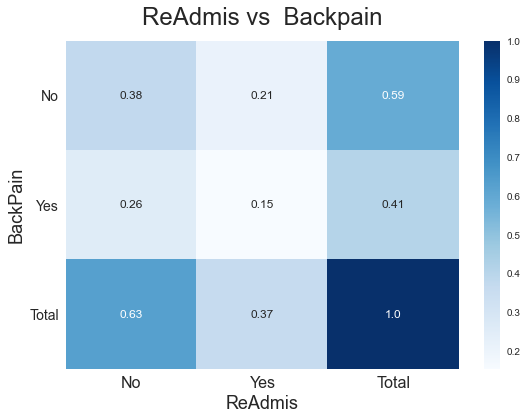

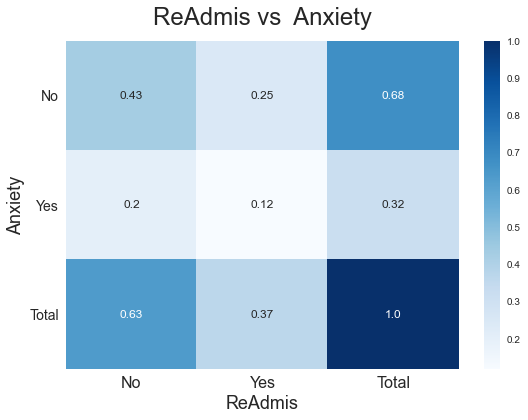

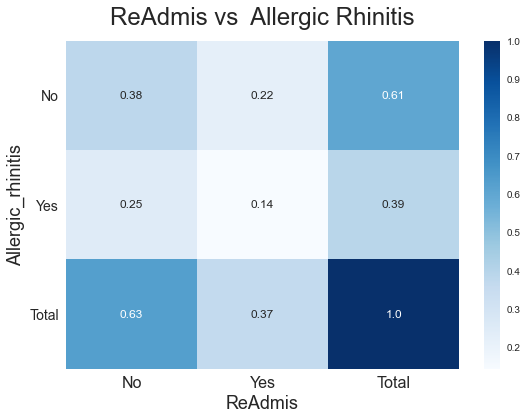

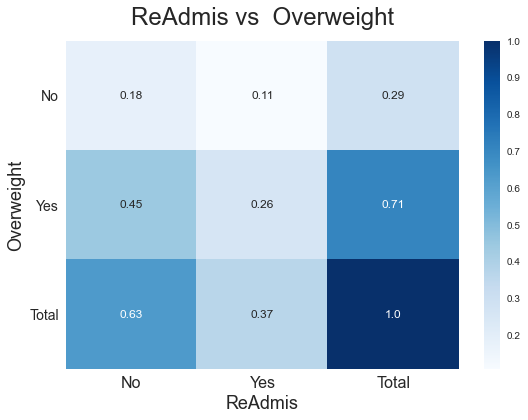

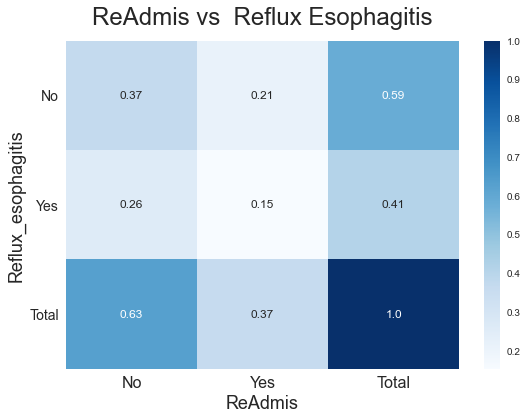

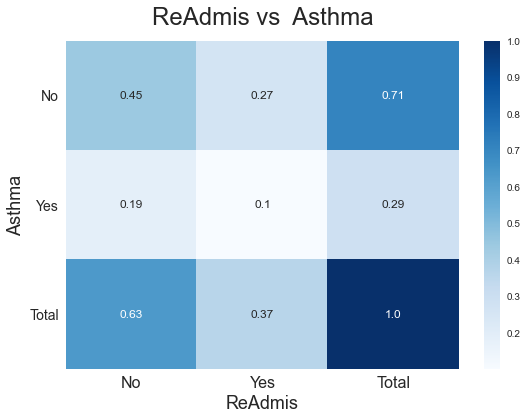

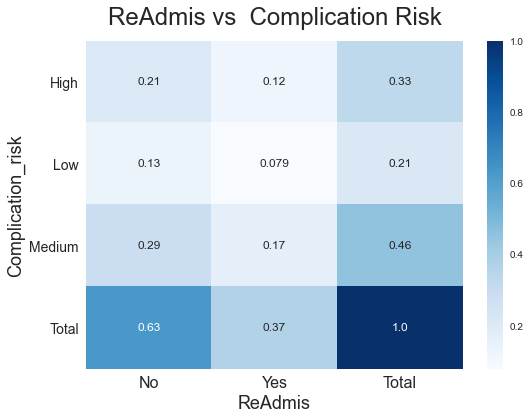

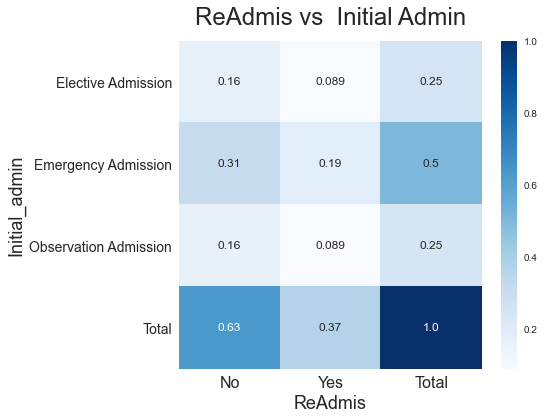

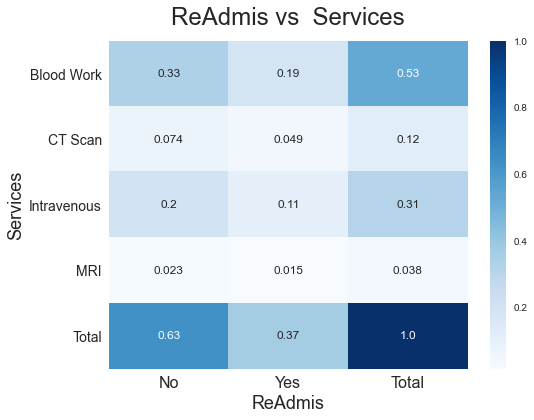

In [54]:
bi_vis_cat(df)

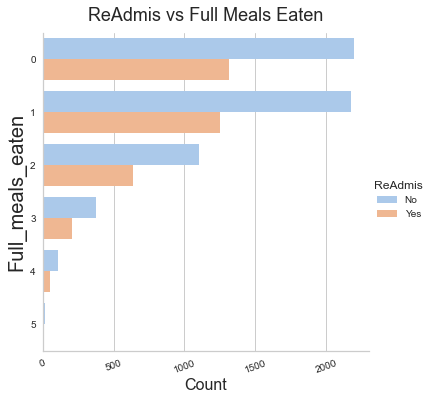

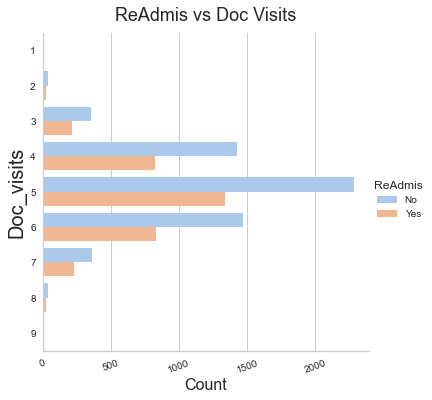

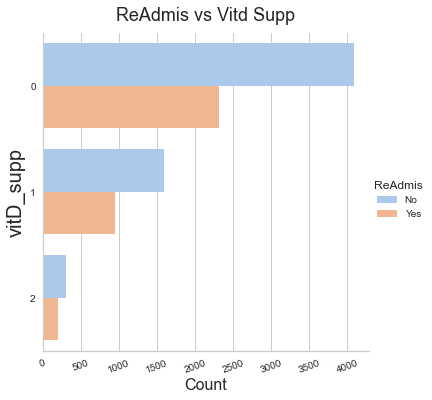

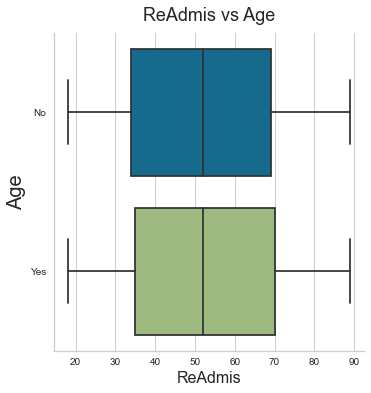

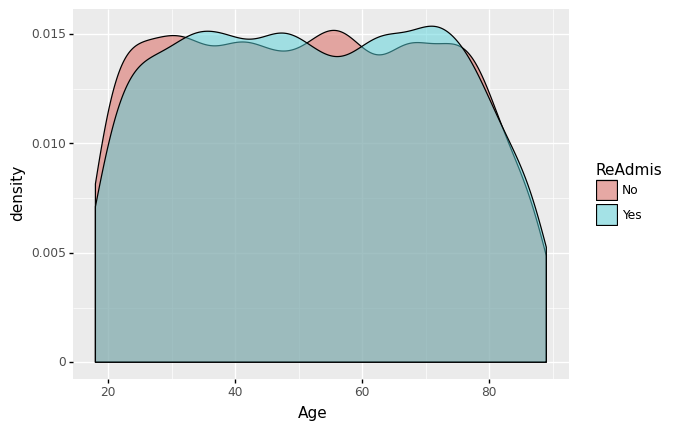

<Figure size 576x396 with 0 Axes>

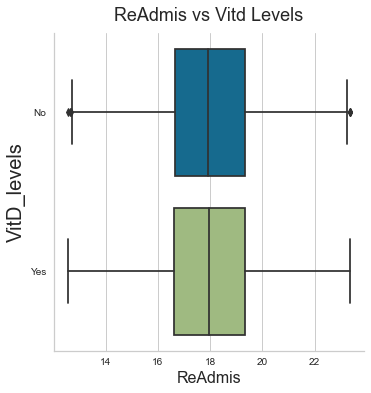

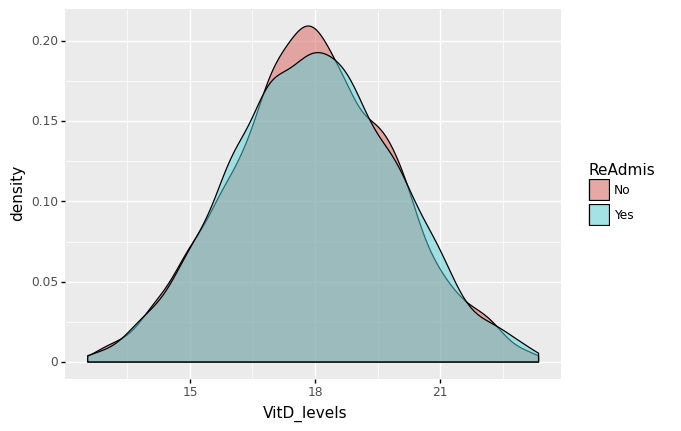

<Figure size 576x396 with 0 Axes>

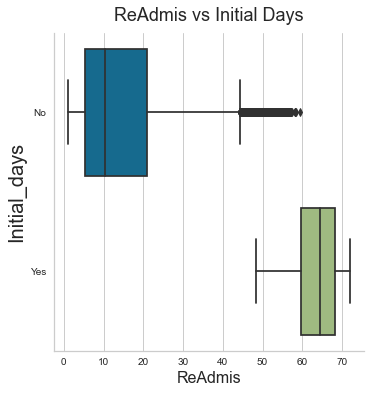

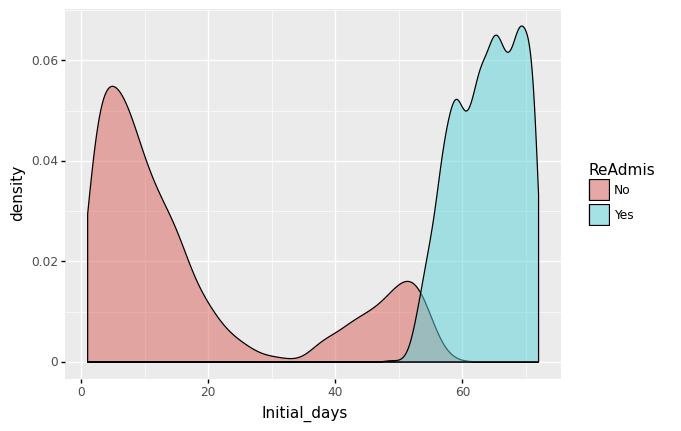

<Figure size 576x396 with 0 Axes>

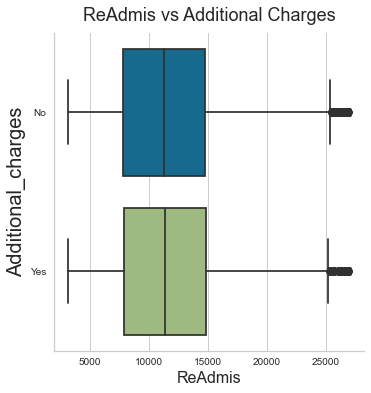

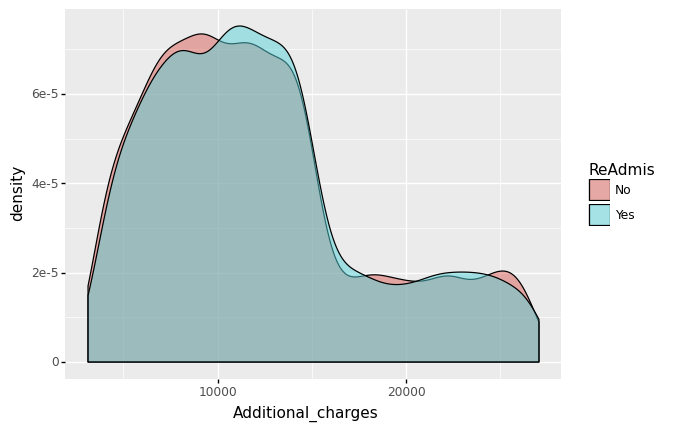

<Figure size 576x396 with 0 Axes>

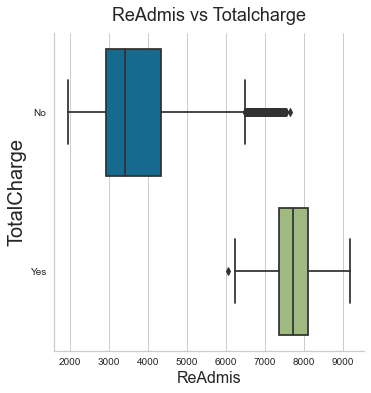

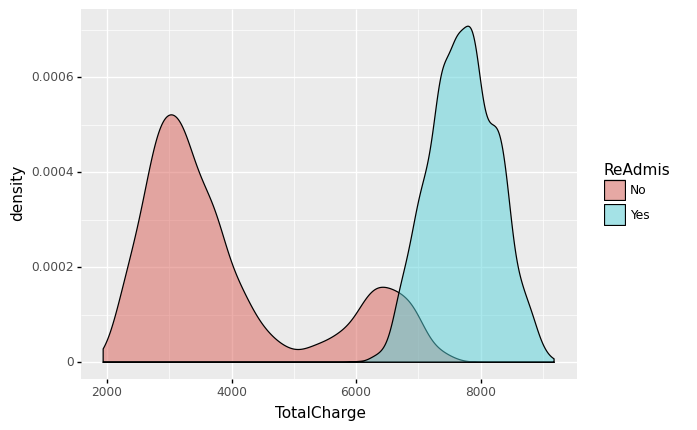

<Figure size 576x396 with 0 Axes>

In [55]:
bi_vis_num(df)

#### C.5. Provide a copy of the prepared data set.

In [94]:
data.to_csv('D208Task2clean.csv')

## Part IV: Model Comparison and Analysis

#### D.1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

ln[p(ReAdmis_Yes)/(1-p(ReAdmis_Yes))] = B0 + B1*'Gender_Male' + B2 * 'Soft_drink_Yes' + B3 * 'HighBlood_Yes' + B4 * 'Stroke_Yes' + B5 * 'Arthritis_Yes' + B6 * 'Diabetes_Yes' + B7 * 'Hyperlipidemia_Yes' + B8 * 'BackPain_Yes'  + B9 * 'Anxiety_Yes' + B10 * 'Allergic_rhinitis_Yes' + B11 * 'Overweight_Yes' + B12 * 'Reflux_esophagitis_Yes' + B13 * 'Asthma_Yes' + B14 * 'Complication_risk_High' + B15 * 'Initial_admin_Emergency Admission' + B16 * 'Services_CT Scan'  + B17 * 'Services_Intravenous' + B18 * 'Full_meals_eaten' + B19 * 'Doc_visits' + B20 * 'vitD_supp' + B21 * 'Age' + B22 * 'VitD_levels' + B23 * 'Initial_days'

In [57]:
data_final.head()

,Gender_Male,Soft_drink_Yes,HighBlood_Yes,Stroke_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Overweight_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Complication_risk_High,Initial_admin_Emergency Admission,Services_CT Scan,Services_Intravenous,Full_meals_eaten,Doc_visits,vitD_supp,Age,VitD_levels,Initial_days,ReAdmis_Yes
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.625,0.0,0.492958,0.609692,0.135022,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.4,0.375,0.5,0.464789,0.591101,0.199037,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.375,0.0,0.492958,0.509489,0.053117,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.2,0.375,0.0,0.845070,0.372614,0.010044,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500,1.0,0.056338,0.452319,0.003562,0.0


##### Initial Model

In [58]:
X = data_final.iloc[:,:-1]
y = data_final['ReAdmis_Yes']

In [59]:
#Create train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [60]:
lr1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model_initial = lr1.fit(X_train, y_train)

In [61]:
y_pred_initial = model_initial.predict(X_test)

In [62]:
pred_results_initial = pd.DataFrame({'y_test': y_test,
                             'y_pred_initial': y_pred_initial})

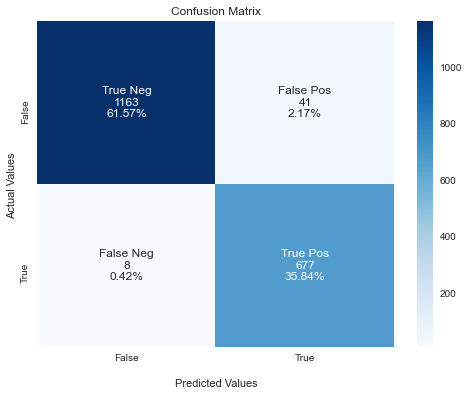

In [63]:
conf_matx(y_test, y_pred_initial)

In [64]:
acc_initial = accuracy_score(y_test, y_pred_initial)
prec_initial = precision_score(y_test, y_pred_initial)
recall_initial = recall_score(y_test, y_pred_initial)

print("accuracy_score  : ", acc_initial)
print("precision_score : ", prec_initial)
print("recall_score    : ", recall_initial)

accuracy_score  :  0.9740603493912123
precision_score :  0.9428969359331476
recall_score    :  0.9883211678832117


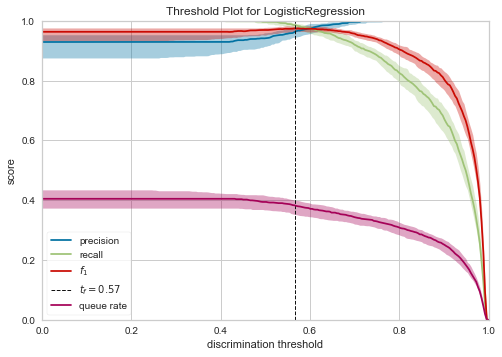

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [65]:
visualizer = DiscriminationThreshold(lr1)
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show() 

Statsmodels regression to find model stats

In [66]:
#Add constant
X_train_sm = X_train
X_train_sm= sm.add_constant(X_train_sm)

In [67]:
model_sm = sm.Logit(y_train,X_train_sm)
results_sm = model_sm.fit()
results_sm.summary2()

Optimization terminated successfully.
         Current function value: 0.035230
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                      Logit                   Pseudo R-squared:        0.946   
Dependent Variable:         ReAdmis_Yes             AIC:                     580.1882
Date:                       2022-04-01 19:03        BIC:                     746.5010
No. Observations:           7553                    Log-Likelihood:          -266.09 
Df Model:                   23                      LL-Null:                 -4973.6 
Df Residuals:               7529                    LLR p-value:             0.0000  
Converged:                  1.0000                  Scale:                   1.0000  
No. Iterations:             14.0000                                                  
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------
const                             -76.2025   4.7084 -16.1843 0.0000 -85.4308 -66.9742
Gender_Male                         0.1002   0.2325   0.4310 0.6665  -0.3555   0.5559
Soft_drink_Yes                      0.2860   0.2662   1.0741 0.2828  -0.2358   0.8078
HighBlood_Yes                       0.9644   0.2439   3.9543 0.0001   0.4864   1.4424
Stroke_Yes                          1.7198   0.2983   5.7662 0.0000   1.1352   2.3044
Arthritis_Yes                      -1.1035   0.2442  -4.5180 0.0000  -1.5822  -0.6248
Diabetes_Yes                        0.2811   0.2549   1.1028 0.2701  -0.2185   0.7808
Hyperlipidemia_Yes                  0.2179   0.2442   0.8922 0.3723  -0.2608   0.6966
BackPain_Yes                        0.2504   0.2289   1.0939 0.2740  -0.1982   0.6990
Anxiety_Yes                        -1.1304   0.2538  -4.4540 0.0000  -1.6278  -0.6330
Allergic_rhinitis_Yes              -0.2938   0.2340  -1.2556 0.2093  -0.7525   0.1648
Overweight_Yes                     -0.3070   0.2510  -1.2229 0.2214  -0.7990   0.1850
Reflux_esophagitis_Yes             -0.2237   0.2345  -0.9538 0.3402  -0.6833   0.2359
Asthma_Yes                         -1.4481   0.2636  -5.4939 0.0000  -1.9648  -0.9315
Complication_risk_High              0.7498   0.2480   3.0234 0.0025   0.2637   1.2358
Initial_admin_Emergency Admission   2.0707   0.2580   8.0270 0.0000   1.5651   2.5763
Services_CT Scan                    1.4996   0.4178   3.5891 0.0003   0.6807   2.3185
Services_Intravenous               -0.1133   0.2578  -0.4395 0.6603  -0.6185   0.3919
Full_meals_eaten                    0.4749   0.5725   0.8295 0.4068  -0.6471   1.5969
Doc_visits                         -0.2297   0.8471  -0.2712 0.7863  -1.8900   1.4306
vitD_supp                           0.3327   0.3946   0.8431 0.3992  -0.4407   1.1062
Age                                 0.5974   0.4042   1.4782 0.1394  -0.1947   1.3896
VitD_levels                         0.2965   0.5906   0.5020 0.6157  -0.8610   1.4540
Initial_days                       99.6238   6.1564  16.1821 0.0000  87.5574 111.6901
=====================================================================================

"""

#### D.2. Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

##### Reduce the model by dropping high p-values

In [68]:
X_train_red = X_train[['HighBlood_Yes', 'Stroke_Yes', 'Arthritis_Yes', 'Anxiety_Yes', 'Asthma_Yes', 'Complication_risk_High',
       'Initial_admin_Emergency Admission', 'Services_CT Scan','Initial_days']]

In [69]:
X_test_red = X_test[['HighBlood_Yes', 'Stroke_Yes', 'Arthritis_Yes', 'Anxiety_Yes', 'Asthma_Yes', 'Complication_risk_High',
       'Initial_admin_Emergency Admission', 'Services_CT Scan','Initial_days']]

In [70]:
lr2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model_reduced = lr2.fit(X_train_red, y_train)

In [71]:
y_pred_reduced = model_reduced.predict(X_test_red)

In [72]:
pred_results_reduced = pd.DataFrame({'y_test': y_test,
                             'y_pred_reduced': y_pred_reduced})

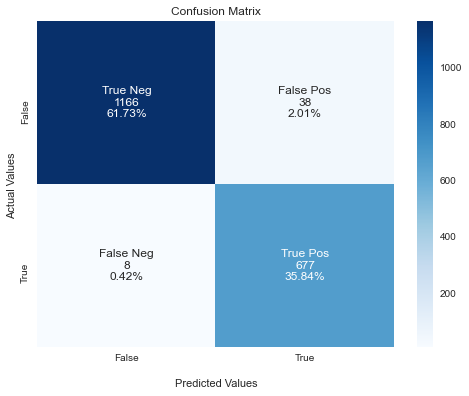

In [73]:
conf_matx(y_test, y_pred_reduced)

In [74]:
acc_reduced = accuracy_score(y_test, y_pred_reduced)
prec_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)

print("accuracy_score  : ", acc_reduced)
print("precision_score : ", prec_reduced)
print("recall_score    : ", recall_reduced)

accuracy_score  :  0.9756484912652197
precision_score :  0.9468531468531468
recall_score    :  0.9883211678832117


In [75]:
# Compare Models
print("accuracy_score:  ", "Initial: {:.4}".format(acc_initial), "  Reduced: {:.4}".format(acc_reduced), " Difference: {:.4}".format(acc_reduced-acc_initial))
print("precision_score: ", "Initial: {:.4}".format(prec_initial), " Reduced: {:.4}".format(prec_reduced), " Difference: {:.4}".format(prec_reduced-prec_initial))
print("recall_score:    ", "Initial: {:.4}".format(recall_initial), " Reduced: {:.4}".format(recall_reduced), " Difference: {:.4}".format(recall_reduced-recall_initial))

accuracy_score:   Initial: 0.9741   Reduced: 0.9756  Difference: 0.001588
precision_score:  Initial: 0.9429  Reduced: 0.9469  Difference: 0.003956
recall_score:     Initial: 0.9883  Reduced: 0.9883  Difference: 0.0


In [76]:
X_train_sm_red = X_train_sm[['const', 'HighBlood_Yes', 'Stroke_Yes', 'Arthritis_Yes', 'Anxiety_Yes', 'Asthma_Yes', 'Complication_risk_High',
       'Initial_admin_Emergency Admission', 'Services_CT Scan','Initial_days']]

In [77]:
model_reduced_sm = sm.Logit(y_train,X_train_sm_red)
results_reduced_sm = model_reduced_sm.fit()
results_reduced_sm.summary2()

Optimization terminated successfully.
         Current function value: 0.036097
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                      Logit                   Pseudo R-squared:        0.945   
Dependent Variable:         ReAdmis_Yes             AIC:                     565.2846
Date:                       2022-04-01 19:03        BIC:                     634.5817
No. Observations:           7553                    Log-Likelihood:          -272.64 
Df Model:                   9                       LL-Null:                 -4973.6 
Df Residuals:               7543                    LLR p-value:             0.0000  
Converged:                  1.0000                  Scale:                   1.0000  
No. Iterations:             14.0000                                                  
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------
const                             -74.4793   4.5216 -16.4718 0.0000 -83.3415 -65.6171
HighBlood_Yes                       0.8699   0.2343   3.7121 0.0002   0.4106   1.3292
Stroke_Yes                          1.7020   0.2916   5.8367 0.0000   1.1305   2.2735
Arthritis_Yes                      -1.0560   0.2381  -4.4356 0.0000  -1.5226  -0.5894
Anxiety_Yes                        -1.0593   0.2447  -4.3281 0.0000  -1.5390  -0.5796
Asthma_Yes                         -1.3952   0.2564  -5.4409 0.0000  -1.8978  -0.8926
Complication_risk_High              0.7863   0.2425   3.2425 0.0012   0.3110   1.2616
Initial_admin_Emergency Admission   2.0480   0.2510   8.1584 0.0000   1.5560   2.5400
Services_CT Scan                    1.5852   0.3945   4.0181 0.0001   0.8120   2.3585
Initial_days                       97.8285   5.9393  16.4715 0.0000  86.1877 109.4692
=====================================================================================

"""

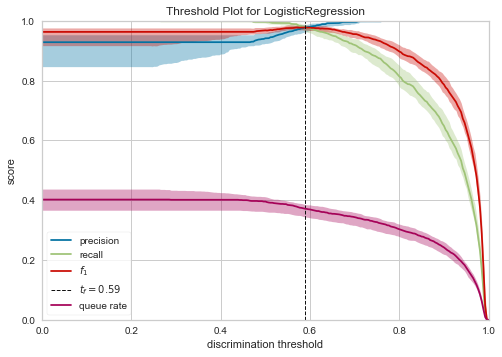

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [78]:
visualizer = DiscriminationThreshold(lr2)
visualizer.fit(X_train_red, y_train)        # Fit the data to the visualizer
visualizer.show() 

All p-values are < 0.05.  I will explore factors further to see if I can weed out less significant factors to improve the model.

##### Chi-squared/log_odds

In [79]:
#Will apply chi-squared test for independence to categorical factors
#Null hypothesis = there is no significate relationship between these two variables.
chi_squared(data_cat)

p value for Gender_Nonbinary is 0.7742583794888096
Do Not Reject Null Hypothesis for Gender_Nonbinary
________________________________________________
p value for Gender_Male is 0.3432950905234027
Do Not Reject Null Hypothesis for Gender_Male
________________________________________________
p value for Soft_drink_Yes is 0.40809668888695005
Do Not Reject Null Hypothesis for Soft_drink_Yes
________________________________________________
p value for HighBlood_Yes is 0.866862056453267
Do Not Reject Null Hypothesis for HighBlood_Yes
________________________________________________
p value for Stroke_Yes is 0.8288598430422423
Do Not Reject Null Hypothesis for Stroke_Yes
________________________________________________
p value for Arthritis_Yes is 0.7932087034903543
Do Not Reject Null Hypothesis for Arthritis_Yes
________________________________________________
p value for Diabetes_Yes is 0.7777762451104113
Do Not Reject Null Hypothesis for Diabetes_Yes
______________________________________

'Services_CT Scan', 'Services_Intravenous' have significant p-values

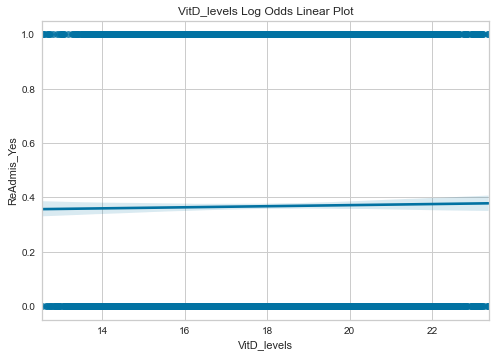

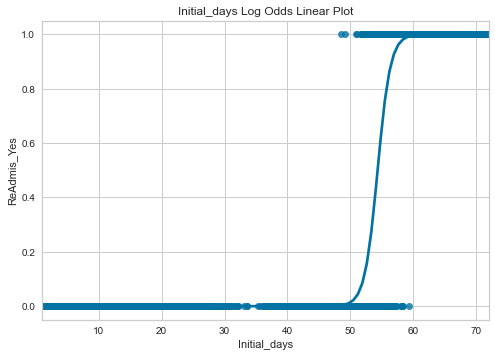

In [80]:
# Test for assumption of linearity of log-odds with ReAdmis
log_odds(data)

##### Final Model

Final model will only have 'Services_CT Scan'and 'Initial_days'

In [81]:
X_train_final = X_train[['Services_CT Scan','Initial_days']]

In [82]:
X_test_final = X_test[['Services_CT Scan','Initial_days']]

In [83]:
lr3 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model_final = lr3.fit(X_train_final, y_train)

In [84]:
y_pred_final= model_final.predict(X_test_final)

In [85]:
pred_results_final = pd.DataFrame({'y_test': y_test,
                             'y_pred_final': y_pred_final})

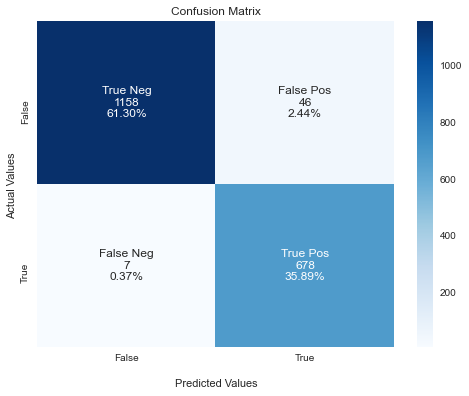

In [86]:
conf_matx(y_test, y_pred_final)

In [87]:
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)

print("accuracy_score : ", acc_final)
print("precision_score : ", prec_final)
print("recall_score : ", recall_final)

accuracy_score :  0.9719428268925357
precision_score :  0.93646408839779
recall_score :  0.9897810218978103


In [88]:
# Compare Models
print("accuracy_score:  ", "Initial: {:.4}".format(acc_initial), " Reduced: {:.4}".format(acc_reduced)," Final: {:.4}".format(acc_final), " Difference: {:.4}".format(acc_final-acc_reduced))
print("precision_score: ", "Initial: {:.4}".format(prec_initial), " Reduced: {:.4}".format(prec_reduced), " Final: {:.4}".format(prec_final), " Difference: {:.4}".format(prec_final -prec_reduced))
print("recall_score:    ", "Initial: {:.4}".format(recall_initial), " Reduced: {:.4}".format(recall_reduced), " Final: {:.4}".format(recall_final), " Difference: {:.4}".format(recall_final-recall_reduced))

accuracy_score:   Initial: 0.9741  Reduced: 0.9756  Final: 0.9719  Difference: -0.003706
precision_score:  Initial: 0.9429  Reduced: 0.9469  Final: 0.9365  Difference: -0.01039
recall_score:     Initial: 0.9883  Reduced: 0.9883  Final: 0.9898  Difference: 0.00146


In [89]:
X_train_sm_final = X_train_sm[['const', 'Services_CT Scan','Initial_days']]

In [90]:
model_final_sm = sm.Logit(y_train,X_train_sm_final)
results_final_sm = model_final_sm.fit()
results_final_sm.summary2()

Optimization terminated successfully.
         Current function value: 0.048529
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit             Pseudo R-squared:  0.926   
Dependent Variable:    ReAdmis_Yes       AIC:               739.0828
Date:                  2022-04-01 19:06  BIC:               759.8719
No. Observations:      7553              Log-Likelihood:    -366.54 
Df Model:              2                 LL-Null:           -4973.6 
Df Residuals:          7550              LLR p-value:       0.0000  
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        13.0000                                      
--------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------
const            -54.8742   2.9136 -18.8339 0.0000 -60.5847 -49.1637
Services_CT Scan   1.0411   0.3155   3.3002 0.0010   0.4228   1.6594
Initial_days      72.8483   3.8571  18.8866 0.0000  65.2884  80.4082
====================================================================

"""

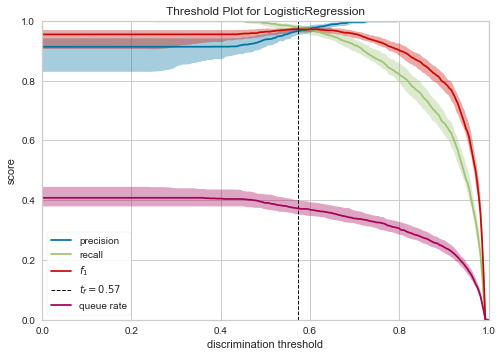

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [91]:
visualizer = DiscriminationThreshold(lr3)
visualizer.fit(X_train_final, y_train)        # Fit the data to the visualizer
visualizer.show() 

#### D.3.  Provide a reduced logistic regression model.

ln[p(ReAdmis_Yes)/(1-p(ReAdmis_Yes))] = B0 + B1* 'Services_CT Scan' + B23 * 'Initial_days'

In [ ]:
results_final_sm.summary2()

#### E.  Analyze the data set using your reduced logistic regression model by doing the following:   
E.1.Explain your data analysis process by comparing the initial and reduced logistic regression models, including the following elements:

**•  The logic of the variable selection technique:**

Selection for the initial model started with choosing medically relevant variables based on their definition in the data dictionary. 25 were kept out of the original 49. Dropped variables included patient identifiers, patient location demographics, information that did not distinguish whether it was from the patient or primary insurance holder, and survey responses. The correlation between target and predictors was evaluated with a correlation map. The correlation between predictors was evaluated with a correlation matrix. 'Gender_Nonbinary', 'Complication_risk_Low', 'Initial_admin_Elective Admission', 'Services_Blood Work', 'Additional_charges', 'TotalCharge' were dropped for correlation problems.  Finally, the multicollinearity of predictors was evaluated with variance inflation factors, none needed to be dropped. 
The initial model had several predictors with p-values >0.05, these were removed. 
The reduced model improved with all significant p-values. 
The final model used only factors that had a significant relationship to the target, as determined by the chi-square test for categorical factors and log-odds of continuous factors.


**•  The model evaluation metric:**

Several metrics were used to compare models. Pseudo R-squared, p-value, log-likelihood,  and AIC generated by the stats model summary were used to compare the behind-the-scenes performance. While Pseudo R-Squared came down 0.02, the other metric improved with model reduction. (Aruchamy, 2021) Accuracy, precision, and recall were computed from predicted results to compare the models' ability to predict the appropriate outcome. There were small differences between models.  Recall, which represents false negatives, or in this case patients at risk for readmission, was best in the final model. 

#### E.2.  Provide the output and any calculations of the analysis you performed, including a confusion matrix.

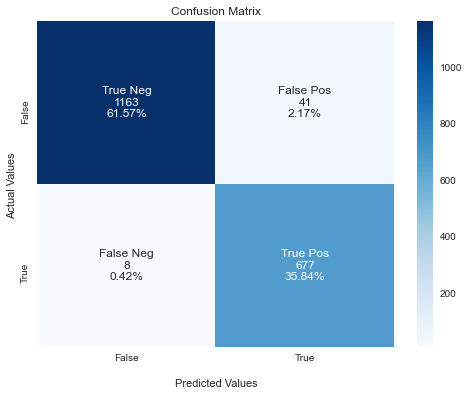

In [92]:
#Initial Model
conf_matx(y_test, y_pred_initial)

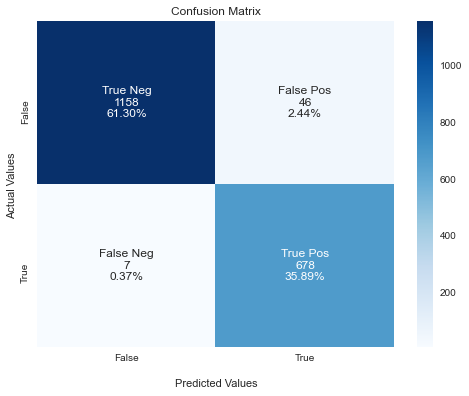

In [93]:
#Final Model
conf_matx(y_test, y_pred_final)

| Model   | Pseudo-R2 | P-Value | Log-Likelihood | LL-Null | AIC | Accuracy | Precision | Recall |
|---------|-----------|---------|----------------|---------|-----|----------|-----------|--------|
| Initial | 0.946     | 0.0     | -266.09        | -4973.6 | 580 | 97.4     | 94.3      | 98.8   |
| Reduced | 0.945     | 0.0     | -272.64        | -4973.6 | 565 | 97.6     | 94.7      | 98.8   |
| Final   | 0.926     | 0.0     | -366.54        | -4973.6 | 739 | 97.2     | 93.7      | 99.0   |

#### E.3.  Provide the code used to support the implementation of the logistic regression models.

See above, Part IV

### Part V: Data Summary and Implications

#### F.  Summarize your findings and assumptions by doing the following:  
F.1.  Discuss the results of your data analysis, including the following elements:

**•  A regression equation for the reduced model:**

ln[p(ReAdmis_Yes)/(1-p(ReAdmis_Yes))] = -54.8742 + 1.0411 * **'Services_CT Scan'** + 72.8483 * **'Initial_days'**

**•  An interpretation of coefficients of the statistically significant variables of the model:**

In the case of the categorical variable, 'Services_CT Scan', if the value is 0, it adds nothing to the equation, or if the value is 1, 1.0411 is added to the equation. For the continuous variable, Initial days, the value is multiplied by 72.8483 and added to the equation.

**•  The statistical and practical significance of the model:**

As a useful tool, the model doesn't have much to offer. "Initial days" is the biggest factor in the model's ability to predict readmission.  Ideally, you would want factors that can predict readmission risk earlier in the initial hospitalization to be able to implement protocols to reduce readmission.As a useful tool, the model doesn't have much to offer. "Initial days" is the biggest factor in the model's ability to predict readmission.  Ideally, you would want factors that can predict readmission risk earlier in the initial hospitalization to be able to implement protocols to reduce readmission.

**•  the limitations of the data analysis:**

None of the underlying comorbidities that one would think would be important,  were significant enough to include in the model. It would be helpful to
discuss this further with the stakeholders to learn more about how their data is gathered. It would also be helpful to have their input about outliers and whether they should be included in the analysis.

##### F.2.  Recommend a course of action based on your results.

I would not recommend that this model be used for projecting readmissions. A more accurate model could be created with more insightful data. I would recommend to stakeholders that quantifying risk factors more precisely would help project readmissions better. For instance, quantifying diabetes with tools such as the Diabetes Severity Score (DISSCO) instead of a simple yes or no would be more informative. (Zghebi, 2020)

### Part VI: Demonstration

##### G.  Provide a Panopto video recording that includes all of the following elements:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=52f145c9-329d-4696-80b4-ae6a017a704d

##### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

https://github.com/cutterback/p02-home-sales-predictive-project/blob/master/Home-Sales-Predictive-Model.ipynb   
    
https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3      

https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

##### I.	Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Aruchamy, Vikram. (2021).  Logistic Regression R | Introduction to Logistic Regression (analyticsvidhya.com)

Bevans, Rebecca. (2021). Choosing the Right Statistical Test | Types and Examples. Choosing the Right Statistical Test | Types and Examples (scribbr.com)

Larose, C. D., & Larose, D. T. (2015). Data Mining and Predictive Analytics. ISBN-13: 978-1-1118-1161-1.